1. Sample $10^4$ points uniformly over the hypercube $[0,1]^d$ (denote this set by $\mathcal X$).
2. For $d\in\{1,2,3,5,10,20,50,100,500\}$ and for the Euclidean distance $\rho$ find
- $\min d(x,\tilde x)$: minimum over $x,\tilde x\in \mathcal X$
- $\overline{d(x,\tilde x)}$: average over $x,\tilde x\in \mathcal X$
- $\max d(x,\tilde x)$: maximum over $x,\tilde x\in \mathcal X$
- $\overline{d_{NN1}(x)}$: average distance to the nearest neighbor
- $ \max d_{NN1}(x)$: maximal distance to the nearest neigbor 

Collect the results in a table

In [3]:
import numpy as np
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
#from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

In [10]:
n = 10**4
arr_d = [1, 2, 3, 5, 10, 20, 50, 100, 500]
result = []
for d in arr_d:
  X = np.random.uniform(0,1,(n,d))
  p = euclidean_distances(X, X)
 # p = np.sort(p)
 # p = p[:,1:]
 # min = p.min()
 # max = p.max()
 # mean = p.mean()
 # mean_nearest = np.amin(p, axis = 1).mean()
 # max_nearest = np.amin(p, axis = 1).max()
 # result.append([d,min, max, mean, mean_nearest, max_nearest])
#print(tabulate(result,headers=["d", "min", "max", "mean", "mean_nearest", "max_nearest"]))
p.shape

(10000, 10000)

3. Generate $10^4$ point such that each point with probability $1/2$
- is sampled from $N(\mu,I)$, $\mu=(a,\dots,a)\in\mathbb R^d$ and gets label $0$
- is sampled from $N(\mu,I)$, $\mu=(-a,\dots,-a)\in\mathbb R^d$ and gets label $1$

Put $a=\frac{2}{\sqrt{d}}$ (the Bayes error will be $\approx 0.023$ for all $d$). 

For $k = 3, 7, 15$  train a $k$-NN classifier for increasing dimensions $1\le d\le 500$ and monitor its performance evaluated by 10 times repeated 10-fold CV. For each $k$ draw the graphs of the mean  missclassification error as a function of $d$.

100%|██████████| 6/6 [14:31<00:00, 145.31s/it]


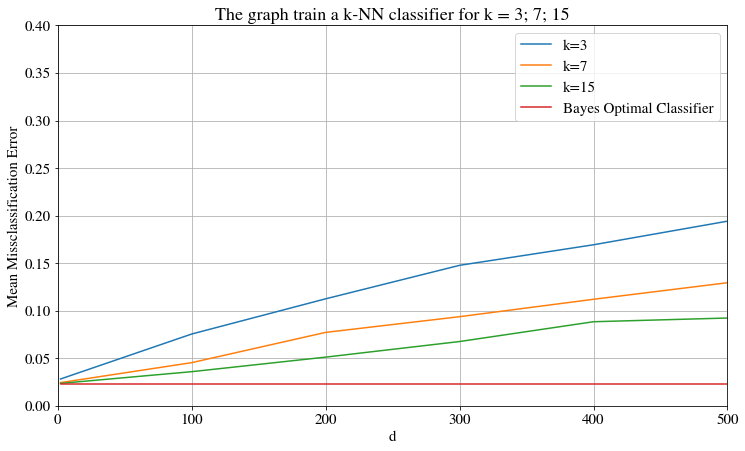

In [8]:
np.random.seed(42)
n = 10**4
mpl.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
plt.figure(figsize=(12, 7))
plt.ylim([0, 0.4])
plt.xlim([0, 500])
plt.title('The graph train a k-NN classifier for k = 3; 7; 15')
plt.xlabel('d')
plt.ylabel('Mean Missclassification Error')
arr_k = [3,7,15]
arr_d = [2,100,200,300,400,500]
for k in arr_k:
    res = []
    for d in tqdm(arr_d):
        a =[ 2.0/np.sqrt(d) for i in range(d)]
        Z=np.random.randn(n, d)
        Y = np.zeros((n, d))+np.random.randint(0,2,(n,1))
        X = (Z + a)*(Y==1) + (Z - a)*(Y==0)
        clf = KNeighborsClassifier(n_neighbors = k)
        scores = cross_val_score(clf, X, Y, cv=10)
        res.append(np.mean(1 - scores))
    plt.plot(arr_d, res, label='k='+str(k))
    plt.legend(loc=0)
plt.plot(arr_d, [0.023 for i in range(len(arr_d))], label='Bayes Optimal Classifier')
plt.legend(loc=0)
plt.grid(True)
plt.show()